In [1]:
using Printf
using Plots
default(size = (400, 250), legend=false, titlefontsize=12)

In [2]:
function laplacian!(v::Vector{Float64}, u::Vector{Float64}, dx::Float64)::Nothing
    v[1] = (u[end] + u[2] - 2u[1])/dx^2
    v[2:end-1] = (u[1:end-2] + u[3:end] - 2u[2:end-1])/dx^2
    v[end] = (u[end-1] + u[1] - 2u[1end])/dx^2
    return
end

laplacian! (generic function with 1 method)

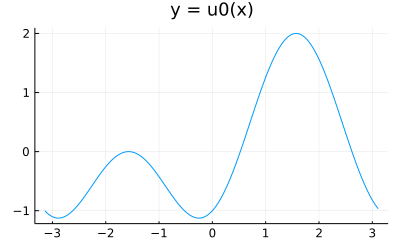

In [3]:
n = 200
x = range(-π, π; length=n+1)[1:end-1]
dx = step(x)
f(x) = sin(x) - cos(2x)
u = f.(x)
plot(x, u; label="", title="y = u0(x)")

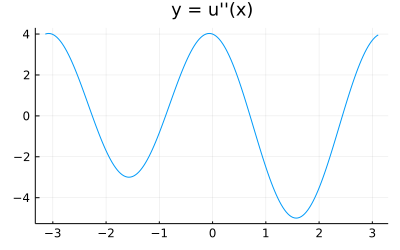

In [4]:
v = similar(u)
laplacian!(v, u, dx)
plot(x, v; label="", title="y = u''(x)")

  0.059042 seconds (76.84 k allocations: 132.530 MiB, 34.84% gc time)
  0.051325 seconds (76.84 k allocations: 132.530 MiB, 26.31% gc time)


┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0004\tmp.gif
└ @ Plots D:\.julia\packages\Plots\FKcum\src\animation.jl:104


Plots.AnimatedGif("D:\\OneDrive\\public\\0004\\tmp.gif")
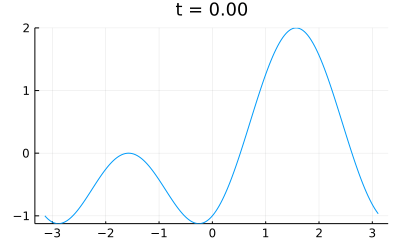

In [5]:
function laplacian!(v::Vector{Float64}, u::Vector{Float64}, dx::Float64)::Nothing
    v[1] = (u[end] + u[2] - 2u[1])/dx^2
    v[2:end-1] = (u[1:end-2] + u[3:end] - 2u[2:end-1])/dx^2
    v[end] = (u[end-1] + u[1] - 2u[1end])/dx^2
    return
end

function heateq(u0::Vector{Float64}, dx::Float64, tmax::Float64, N::Int=200)::Tuple{Vector{Float64}, Matrix{Float64}}
    t = 0:dx:tmax
    dt = t[2] - t[1]
    u = Matrix{Float64}(undef, length(u0), length(t)+1)
    u[:, 1] = u0
    v = Vector{Float64}(undef, length(u0))
    for i in 2:length(t)+1
        u[:, i] = u[:, i-1]
        for _ in 1:N
            laplacian!(v, u[:, i], dx)
            u[:, i] += v*dt/N
        end
    end
    t, u
end

n = 200
x = range(-π, π; length=n+1)[1:end-1]
dx = step(x)
f(x) = sin(x) - cos(2x)
u0 = f.(x)
tmax = 1.0

@time t, u = heateq(u0, dx, tmax)
@time t, u = heateq(u0, dx, tmax)
@gif for i in 1:length(t)
    tstr = @sprintf("t = %4.2f", t[i])
    plot(x, u[:, i]; ylim=extrema(u0), title="$tstr")
end

In [6]:
function laplacian2!(v::Vector{Float64}, u::Vector{Float64}, dx::Float64)::Nothing
    v[1] = (u[end] + u[2] - 2u[1])/dx^2
    @. @views v[2:end-1] = (u[1:end-2] + u[3:end] - 2u[2:end-1])/dx^2
    v[end] = (u[end-1] + u[1] - 2u[1end])/dx^2
    return
end

function heateq2(u0::Vector{Float64}, dx::Float64, tmax::Float64, N::Int=200)::Tuple{Vector{Float64}, Matrix{Float64}}
    t = 0:dx:tmax
    dt = t[2] - t[1]
    u = Matrix{Float64}(undef, length(u0), length(t)+1)
    u[:, 1] = u0
    v = Vector{Float64}(undef, length(u0))
    for i in 2:length(t)+1
        @. @views u[:, i] = u[:, i-1]
        for _ in 1:N
            @views laplacian2!(v, u[:, i], dx)
            @. @views u[:, i] += v*dt/N
        end
    end
    t, u
end

n = 200
x = range(-π, π; length=n+1)[1:end-1]
dx = step(x)
f(x) = sin(x) - cos(2x)
u0 = f.(x)
tmax = 1.0

t, u = heateq2(u0, dx, tmax)

LoadError: MethodError: no method matching laplacian2!(::Vector{Float64}, ::SubArray{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}, ::Float64)
[0mClosest candidates are:
[0m  laplacian2!(::Vector{Float64}, [91m::Vector{Float64}[39m, ::Float64) at In[6]:1

  0.000643 seconds (4 allocations: 53.734 KiB)
  0.000640 seconds (4 allocations: 53.734 KiB)


┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0004\tmp.gif
└ @ Plots D:\.julia\packages\Plots\FKcum\src\animation.jl:104


Plots.AnimatedGif("D:\\OneDrive\\public\\0004\\tmp.gif")
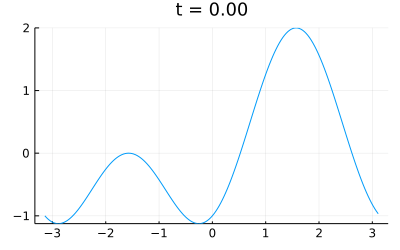

In [7]:
function laplacian3!(v::Vector{Float64}, u, dx::Float64)::Nothing
    v[1] = (u[end] + u[2] - 2u[1])/dx^2
    @. @views v[2:end-1] = (u[1:end-2] + u[3:end] - 2u[2:end-1])/dx^2
    v[end] = (u[end-1] + u[1] - 2u[1end])/dx^2
    return
end

function heateq3(u0::Vector{Float64}, dx::Float64, tmax::Float64, N::Int=200)::Tuple{Vector{Float64}, Matrix{Float64}}
    t = 0:dx:tmax
    dt = t[2] - t[1]
    u = Matrix{Float64}(undef, length(u0), length(t)+1)
    u[:, 1] = u0
    v = Vector{Float64}(undef, length(u0))
    N = 100
    for i in 2:length(t)+1
        @. @views u[:, i] = u[:, i-1]
        for _ in 1:N
            @views laplacian3!(v, u[:, i], dx)
            @. @views u[:, i] += v*dt/N
        end
    end
    t, u
end

n = 200
x = range(-π, π; length=n+1)[1:end-1]
dx = step(x)
f(x) = sin(x) - cos(2x)
u0 = f.(x)
tmax = 1.0

@time t, u = heateq3(u0, dx, tmax)
@time t, u = heateq3(u0, dx, tmax)
@gif for i in 1:length(t)
    tstr = @sprintf("t = %4.2f", t[i])
    plot(x, u[:, i]; ylim=extrema(u0), title="$tstr")
end

  0.224584 seconds (1.43 M allocations: 82.032 MiB, 5.38% gc time, 99.69% compilation time)
  0.000795 seconds (10 allocations: 53.812 KiB)


┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0004\tmp.gif
└ @ Plots D:\.julia\packages\Plots\FKcum\src\animation.jl:104


Plots.AnimatedGif("D:\\OneDrive\\public\\0004\\tmp.gif")
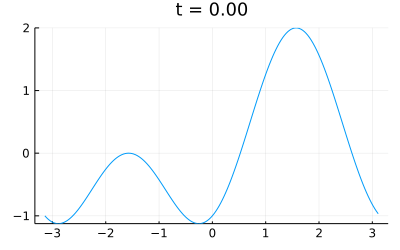

In [8]:
function laplacian4!(v, u, dx)
    v[begin] = (u[end] + u[begin+1] - 2u[begin])/dx^2
    @. @views v[begin+1:end-1] = (u[begin:end-2] + u[begin+2:end] - 2u[begin+1:end-1])/dx^2
    v[end] = (u[end-1] + u[begin] - 2u[1end])/dx^2
    return
end

function heateq4(u0, dx, tmax, N=200)
    t = 0:dx:tmax
    dt = step(t)
    u = similar(u0, length(u0), length(t)+1)
    u[:, 1] = u0
    v = similar(u0)
    N = 100
    for i in 2:length(t)+1
        @. @views u[:, i] = u[:, i-1]
        for _ in 1:N
            @views laplacian4!(v, u[:, i], dx)
            @. @views u[:, i] += v*dt/N
        end
    end
    t, u
end


n = 200
x = range(-π, π; length=n+1)[1:end-1]
dx = step(x)
f(x) = sin(x) - cos(2x)
u0 = f.(x)
tmax = 1.0

@time t, u = heateq4(u0, dx, tmax)
@time t, u = heateq4(u0, dx, tmax)
@gif for i in 1:length(t)
    tstr = @sprintf("t = %4.2f", t[i])
    plot(x, u[:, i]; ylim=extrema(u0), title="$tstr")
end

typeof(x) = StepRangeLen{Float32, Float64, Float64}
typeof(dx) = Float32
typeof(u0) = Vector{Float32}
typeof(t) = StepRangeLen{Float32, Float64, Float64}
typeof(u) = Matrix{Float32}


┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0004\tmp.gif
└ @ Plots D:\.julia\packages\Plots\FKcum\src\animation.jl:104


Plots.AnimatedGif("D:\\OneDrive\\public\\0004\\tmp.gif")
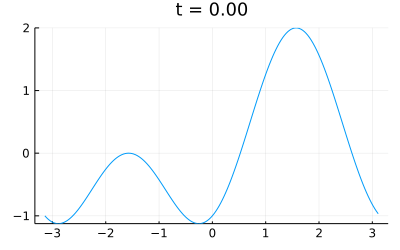

In [9]:
n = 200
x = range(-Float32(π), π; length=n+1)[1:end-1]
dx = step(x)
@show typeof(x) typeof(dx)
f(x) = sin(x) - cos(2x)
u0 = f.(x)
@show typeof(u0)
tmax = Float32(1)

t, u = heateq4(u0, dx, tmax)
@show typeof(t) typeof(u)
@gif for i in 1:length(t)
    tstr = @sprintf("t = %4.2f", t[i])
    plot(x, u[:, i]; ylim=extrema(u0), title="$tstr")
end

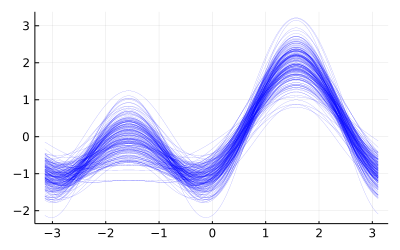

In [10]:
using StaticArrays

n = 200
x = range(-π, π; length=n+1)[1:end-1]
dx = step(x)
m = 200
noise1, noise2 = 0.3randn(m), 0.3randn(m)
f(x) = SVector{m}((1 .+ noise1)*sin(x) .- (1 .+ noise2)*cos(2x))
u0 = f.(x)

plot()
for k in 1:m
    plot!(x, (p -> p[k]).(u0); lw=0.1, color=:blue)
end
plot!()

  3.318327 seconds (14.11 M allocations: 610.680 MiB, 12.11% gc time, 94.16% compilation time)
  0.167388 seconds (11 allocations: 10.377 MiB)


┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0004\tmp.gif
└ @ Plots D:\.julia\packages\Plots\FKcum\src\animation.jl:104


Plots.AnimatedGif("D:\\OneDrive\\public\\0004\\tmp.gif")
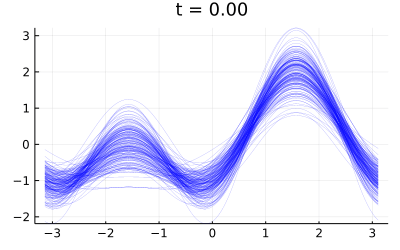

In [11]:
tmax = 1.0
@time t, u = heateq4(u0, dx, tmax)
@time t, u = heateq4(u0, dx, tmax)

ylim = (minimum(minimum.(u0)), maximum(maximum.(u0)))
@gif for i in 1:length(t)
    title = @sprintf("t = %4.2f", t[i])
    plot()
    for k in 1:m
        plot!(x, (p -> p[k]).(u[:, i]); ylim, lw=0.1, color=:blue)
    end
    title!(title)
end